imports

In [1]:
import dataLoader2
from configParser import ConfigParser

params

In [2]:
# defining global variables
experimentName = "test_22987"
list_of_sizes_of_interest = [20,50,100] 

params = ConfigParser(experimentName).read()
print(params)

{'image_path': '/data/BGNN_data/INHS_cropped', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 1, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}


pre-defined strings

In [3]:
cleaned_species_csv_fileName = "cleaned_metadata.csv"
species_csv_fileName_header = "fileName"
species_csv_scientificName_header = "scientificName"
species_csv_Genus_header = "Genus"
species_csv_Family_header = "Family"
image_subpath = "/images"
species_csv_usedColumns = [species_csv_fileName_header,
                          species_csv_scientificName_header,
                          species_csv_Genus_header,
                          species_csv_Family_header]

Create dataset

In [4]:
dataset = dataLoader2.FishDataset(params, True)
speciesList = dataset.getSpeciesList()
numberOfSpecies = len(speciesList)
print("Number of species = ", numberOfSpecies)

Loading dataset...


100% (22987 of 22987) |##################| Elapsed Time: 0:09:59 Time:  0:09:59


Loading saved dataset structure...
Number of species =  221


In [5]:
print(speciesList)

['Anguilla rostrata', 'Aphredoderus sayanus', 'Hoplomyzon sexpapilostoma', 'Labidesthes sicculus', 'Carpiodes cyprinus', 'Carpiodes carpio', 'Catostomus commersonii', 'Catostomus clarkii', 'Erimyzon claviformis', 'Hypentelium nigricans', 'Ictiobus cyprinellus', 'Moxostoma carinatum', 'Moxostoma macrolepidotum', 'Moxostoma erythrurum', 'Centrarchus macropterus', 'Enneacanthus gloriosus', 'Enneacanthus chaetodon', 'Enneacanthus obesus', 'Lepomis cyanellus', 'Lepomis macrochirus', 'Lepomis megalotis', 'Lepomis gibbosus', 'Lepomis gulosus', 'Lepomis hybrid', 'Lepomis humilis', 'Lepomis auritus', 'Lepomis microlophus', 'Lepomis punctatus', 'Lepomis miniatus', 'Lepomis F2', 'Lepomis symmetricus', 'Lepomis marginatus', 'Lepomis introgressed', 'Micropterus dolomieu', 'Micropterus salmoides', 'Micropterus treculii', 'Pomoxis nigromaculatus', 'Triportheus albus', 'Alosa pseudoharengus', 'Alosa chrysochloris', 'Alosa alabamae', 'Alosa mediocris', 'Alosa sapidissima', 'Misgurnus anguillicaudatus',

Data Loader

In [6]:
train_loader, validation_loader, test_loader = dataLoader2.getLoadersFromDataset(dataset, params, experimentName)

for batch in train_loader:
    print(batch['class'])

tensor([ 19, 152, 133, 164,  19,  64,  24,  19, 142,  68,  57,  24, 153,  60,
         64,  99,  66,  20, 133,  26, 199,  64,  87,  60,  57,  18,  44, 153,
         64,  20,  70,  20, 142, 199,  18,  21,  18,  18, 133,  50,  60,  22,
         60, 112,  60,  18,  61,  64,  60,  18,  64,  60,  19,  66,  28,  60,
         19,  84,  60, 199, 153, 107,  60,  73,  18,  50,  95,  63, 199, 133,
        133,  20,  20,  50, 177,  57,  60,  60, 133, 142,  19,  73, 142, 156,
         64,  88, 152, 152,  20,  63,  93, 181,  24,  20,  19,  18,  83,  64,
        199, 199, 199, 142,  93,  19, 152, 142, 153, 144, 133,  20, 142,  79,
         78,  18,  75, 152,  18,  19,  18,  20,  18,  57, 142,  65,  79,  63,
         60, 133,  19,  57,  19,  57,  64,  18, 100,  19, 133,  24, 152,  64,
        145,  19,  60,  23,  64, 199,  60,  50,  60, 154,  87,  73,  50,  19,
        159,  65,  20,  61,  26,  83,  78,  71,  73, 116, 153,  60,  69,  94,
         20,  19,  64, 214,  18, 142,  20, 152, 133, 199,  61,  

tensor([ 60,  54,  18,  18,  50,  73,  18,  18, 133,  62, 181,  64,  18,  18,
        142,  64,  27,  79,  63,  19,  56,  90,  50,  60,  60,  18,  18,  18,
        199,  18, 199,  60,  79, 144, 135,  19, 199,  19, 142,  24,  20,  60,
        133,  73,  18,  57,  24, 158,  18,  18,  64, 166,  28,  60,  24,  20,
        158, 199,  59, 153, 199, 133, 159,  60,  72, 142, 133, 160, 133, 199,
        155, 154,  60, 177,  19,  57, 153,  57,  63,  66,  79,  63, 152,  63,
         75,  60,  18,  50,  63,  58,  58,  25, 152,  24,  71, 142,  60,  82,
         25, 133,  18, 133,  82,  63, 152,  19,  64, 153,  39,  20,  57,  22,
         18,  18,  18,  20,  60,  63,  18, 153,  60,  19,  19,  18,  78,  20,
         63, 152,  22,  20, 152,  82,  64, 155,  19, 179,  18,  18,  60,  68,
         63, 177,  63,  24,  73,  57, 152,  68,  63,  57,  18,  66,  22, 212,
         19, 153,  20, 154, 152, 181, 216,  29, 182,  57,  18,  89,  18, 159,
        156,  50,  57, 133,  26,  18,  50,  60, 158,  93, 154,  

tensor([ 15,  19,  18,  64,  18,  64, 199, 183,  60,  15,  20,  20,  19,  19,
         69,  78,  21, 133,  88,  71,  19,  95,  64, 181,  64, 156,  19,  20,
         20,  20,  18,  20,  57, 155,  24, 153, 178,  39, 133, 154,  18,  19,
         18,  24, 160,  64,  63, 179,  60,  18,  57, 152, 199,  64,  19,  64,
         20,  99, 152,  57, 133,  18,  18,  24, 199,  60,  60,  61,  73, 199,
        158, 161,  92,  57, 142,  22,  50, 133,  18,  24,  64,  20,  20,  27,
         18, 117,  19,  24, 133,  24, 199,  12,  63,  18,  64,  68,  62,  18,
         64,  24,  73, 181,  19,  18,  11,  39,  60, 216,  71,  60, 155,  73,
         60,  50,  64,  20,  64, 133,  71,  18,  63,  50,  19,  19,  24, 199,
         50,  50, 154, 152, 144,  19,  18,  57,  64,  71, 158,  60,  24,  94,
         87,  20,  18,  19,  63,  18,  19, 178, 142,  20,  24,  50,  61,  57,
        214, 153,  60,  24,  21, 133,  18,  28,  21,  18,  19,  19, 182,  64,
         21,  75,  18,  24,  62,  19,  99,  19,  50, 142, 142,  

tensor([ 73,  19,  60,  64,  18,  79,  50,  75, 133,  94,  19, 133,  19,  24,
         57,  18,  19,  63, 199,  44, 199, 181, 177,  64,  19,  18,  64,  89,
        142,  63,  60,  20,  63,  60, 152, 152,  18, 153,  20, 133,  18,  57,
         20,  60,  26,  50, 181, 142, 142,  96,  19,  82,  39, 181,  18,  79,
         19,  63,  64, 199,  85,  18,  64,  71, 153, 152,  19,  61,  64, 155,
         19,  59,  84,  60,  57,  78,  89,  20,  73,  71,  22, 142,  19,  24,
         62,  19, 152,  20,  71,  63, 199,  18, 199, 133,  19,  60, 199,  60,
         64,  18,  64,  18, 142, 199,  18,  18,  69,  22,  18,  84,  19,  18,
         60, 142, 107,  18,  64, 142,  63, 212, 142, 133, 199,  60, 154,  50,
         24,  63,  19,  60, 199,  93,  19,  18,  60, 152,  79, 181,  87,  61,
        214, 136,  57,  19,  18,  18, 100,  19,  79, 142,  19,  64,  73,  21,
        152,  19,  64,  63,  57, 199, 152,  26,  24,  69,  64,  61,  64,  50,
         68,  20,  57,  39,  89,  50,  20,  75, 199,  20, 113,  

tensor([133,  60,  18, 199, 199,  19,  26, 199,  73, 133, 154, 153,  25,  64,
         60,  60, 152,  19,  18,  60, 167, 177,  57,  18,  18,  20,  60, 181,
         64,  58,  60,  18,  22,  79, 152,  60, 181, 199,  24, 177,  18, 152,
         60, 152,  63,  60,  24,  19,  60,  19, 152, 199,  57, 154, 142,  64,
         23,  50,  50, 199,  18, 199,  60, 177, 214,  58,  18, 133, 181,  18,
         20,  64,  78,  64,  19, 166, 199,  63,  18,  60, 152,  60,  60, 102,
         73,  20,  18,  71,  71,  24,  60, 163,  66,  63, 152,  20, 152,  50,
        142, 155,  60,  19,  60,  18,  57,  19,  60,  57,  19,  31, 153,  60,
        152,  60,  19, 133,  26, 152,  19, 199, 134,  24, 142,  18,  60,  64,
        154,  60,  60, 142, 158,  19,  60,  39, 161,  18,  19,  82,  99,  60,
         18,  79,  64,  18,  20,  19,  64,  18,  19, 133, 153,  19,  20, 199,
         63,  60,  61,  60,  64,  57,  19,  21, 153,  18,  20, 158,  18,  24,
        154,  73,  61,  99,  19,  18,  19, 136, 152,  58,  18, 1

tensor([ 18, 200,  73,  50,  25,  57,  20, 183, 152,  18,  24,  95,  20, 199,
        142,  19,  18,  62,  57,  18,  64, 199,  75,  18,  19, 142,  60,  20,
         19, 133,  66,  64,  18,  24, 133, 153,  18,  61,  58,  60, 199, 153,
        178,  21,  18,  19, 183,  19,  64,  19,  64, 133,  18,  18, 199,  20,
         28,  61,   8, 169, 181,  78,  73,  20,  24,  60,  20, 159, 199,  64,
         61, 133,  63,  21,  20,  57,  18,  84, 133,  68, 144,  61, 178, 155,
        199,  18,  61, 177, 198, 178, 129,  60, 152,  19,  73,  18,  71,  20,
         60,  20,  60,  20,  24,  64,  60,  39,  60,  18,  18,  60,  18,  19,
         57, 144, 182,  18, 177,  18,  31,  18,  19,  22, 133,  39,  50,  83,
         64,  20,  64,  18,  89,  60, 186,  18, 199,  57,  20,  50, 199, 199,
        142,  19,  60,  18, 177,  50, 142, 142,  50,  73,  57,  92,  89,  60,
         19,  18, 144,  24,  18, 133,  57,  58, 133,  18, 199, 142, 133,  18,
         19,  60,  60, 153,  19,  18,  30,  19,  58,  18,  18,  

tensor([142, 164,  28,  60,  18,  57, 133, 154,  57,  63, 153,  57, 177,  19,
         78,  19,  26, 183, 153,  68,  24,  60,  22,  61,  77,  20,  71,  60,
        144, 133,  20,  40,  19,  19,  64, 154,  39,  26,  20, 144,  79,  38,
        133,  73,  60, 133, 156,  96, 186,  60, 198,  19, 178, 106, 199,  82,
        152,  18,  18, 154,  24, 178,  20,  18,  31,  71,  60,  89,  60,  57,
         89,  71,  63,  60,  57,  18,  57,  73,  19,  57,  57,  63,  73,  64,
         79,  18,  21,  83, 179, 133,  63,  60,  57, 133,  60,  79, 160,  58,
         18, 153,  78,  18, 152,  18,  24,  22, 144,  20,  22,  66,  20, 199,
         60,  64, 142, 178,  60,  64, 199, 181, 133,  60,  18,  24, 144,  19,
        133,  66,  64,  39,  61,  60, 177, 112,  20, 177,  59,  60, 163,  19,
        133, 161,  50,  22,  64,  79, 152,  66, 142,  18, 199,  19, 133, 199,
         19, 152,  20,  22,  50,  59,  24,  19,  25, 152, 133,  30, 152, 142,
         19, 133,  57,  64,  60,  50, 133, 199, 152,  79,  28,  

tensor([ 18, 133,  83, 121, 153,  60,  57,  50,  20, 133,  18,  60,  60,  62,
        199,  15,  57,  20,  64, 100,  24, 156,  60,  75,  20,  18,  64,  20,
         24, 182,  27, 199,  57,  19, 142,  22,  88,  24,  57,  18,  25,  19,
         19,  18,  19,  19,  60,  64,  64,  18,  73,  60,  60,  64, 152,  18,
         19,  73,  19, 133, 110, 213,  63,  62, 133,  60,  19,  59,  81, 160,
         60, 182,  60,  19,  61,  21, 152,  57,  19,  79,  60,  20, 158, 153,
         71, 133,  19, 133,  75,  18,  21, 181,  60,  79, 183, 142, 185,  19,
         63,  50,  60, 152,  57,  60,  21,  18, 142, 142,  18,  19, 142, 199,
        116,  15,  64,  63,  20, 177, 182,  20,  19,  50,  79, 164,  60, 199,
         63, 199, 181,  57, 142,  18,  78,  20, 133,  20,  18, 144,  63,  20,
        159, 154, 133, 199,  81, 144,  24,  60,  18,  82,  57,  19,  57,  75,
        153,  24,  71,  60,  22, 181,  75, 199, 199, 133,  19,  99, 181,  22,
         71,  79,  18,  64,  24,  78,  57,  71,  68,  22,  63, 1

tensor([ 60,  57, 199, 134,  79,  60, 199, 156,  20,  63,  18,  66,  57,  20,
         60,  63,  19, 152,  24,  44, 186,  19,  18, 177,  18, 177, 152, 181,
         61,  15,  18,  19,  20, 199,  73,  19,  64,  18,  57,  18, 199,  57,
         19, 133,  24,  18, 142, 199,  24, 133, 177,  64,  75, 142,  66,  60,
         85, 179,  19,  71,  19,  50,  19, 142,  57, 161, 133, 154,  18,  57,
         64,  79, 199,  61, 165,  75,  78,  20,  60,  57,  18, 213,  24,  60,
        133,  61,  60,  57,  19,  19,  64, 142,  18,  63,  64,  94,  18,  18,
         20,  75,  18,  18, 133,  20, 142,  19,  63,  18, 199,  24,  19,  20,
         73,  18,  57,  63, 100,  60,  39, 158, 133,  18,  19,  25, 181,  50,
         57,  19,  87,  19,  18,  18,  19,  63,  64,  18,  64,  60,  63,  19,
         19, 142,  21,  18,  18, 133,  18,  19,  60, 144,  63,  94,  50, 153,
        199, 133,  71,  18,  60,  22,  60,  63,  19,  71, 116,  19, 133,  60,
         64,  24,  60,  20,  18,  60,  64,  20, 133,  22,  19,  

tensor([142,  60,  50,  64,  24,  19,  73,  60,  19,  20, 199,  57,  18,  19,
        177,  18,  21,  79,  18,  60, 142,  62,  63,  24,  19,  39,  44,  50,
         57,  75,  19,  60,  20, 142,  64,  85, 199,  50,  18,  18, 199,  78,
         61,  18,  18,  60, 178, 154,  19,  57,  64, 113,  24,  50, 152,  71,
         44,  18,  57,  18, 142,  62,  96, 154, 133,  61,  19,  19,  39,  57,
         19,  60, 133, 106,  60,  75, 152,  20,  60, 133,  79, 142,  19,  64,
         64,  60, 153,  50,  18, 199,  87,  92,  60,  79,  19,  19, 152, 109,
         57,  64,  72, 133,  64,  18,  87,  63,  60,  18, 142,  64,  79, 154,
         96,  60,  20,  60, 153,  61,  19,  19,  20, 177,  64,  50, 199,  58,
         57,  18, 199,  64,  20,  24, 152,  19,  22,  18,  24,  19,  20,  24,
         60,  60,  60,  18,  18,  23,  57, 153, 152,  19, 142, 181,  60,  64,
         20,  20,  68,  22,  64, 155, 153,  24,  20,  71,  24, 181,  60,  19,
        142, 133,  22,  19,  50,  61,  93,  24,  79,  19, 177, 1

In [7]:
for batch in validation_loader:
    print(batch['class'])

tensor([142,  61,  63, 133, 142,  20,  18,  71,  68,  20,  57, 181,  20,  73,
         19, 134,  25,  24,  24, 152,  50,  19, 142,  71, 152, 186, 133,   4,
        133,  24,  18,  24, 133,  24,  60, 133,  60,  60,  64, 199,  62,  19,
         60,  50,  60, 178, 199,  18, 142,  71,  63,  22,  60,  60,  22,  22,
         64,  50,  60, 156,  79, 133,  19,  60,  21, 142,  18,  61,  18,  19,
         79, 181, 199,  18,  60,  78,  68,  68, 129,  73,  24,  60,  64,  79,
         19,  89,  69,  63,  50, 183,  18, 199,  81,  90,  18, 162,  50, 133,
        164,  18,  20, 154,  57,  78, 142,  89, 214,  60,  44,  19,  58,  19,
         50, 142,  60,  24,  18,  26,  61,  19,  62, 152,  18, 156, 142,  64,
         50,  18, 199,  18,  60, 104,  79,  20,  50,  60,  63, 199,  63,  18,
         60,  44,  50, 154,  64,  18,  50,  57, 104, 199,  64,  19, 133,  26,
         60,  19,  24,  24,  50, 199, 144, 177,  24,  79,  62,  20,  61,  20,
        153,  50,  59,  75,  63,  60,  18,  18,  18,  57,  18,  

tensor([ 60,  44,  50, 156,  19,  21,  71,  43,  58,  44,  64, 182,  19,  25,
         20,  18, 142, 152,  64,  18,  20,  18,  20,  57,  24,  57,  20, 133,
         18,  56, 133, 153, 133,  57,  28,  60,  22, 159,  50,  57, 181,  60,
        152, 218,  26,  64,  19, 144,  19,  87,  81,  19,  18, 155,  18,  60,
         18, 154,  18,  60,  42,  18,  64,  20,  19,  64,  24,  18,  27,  18,
        153,  18,  20, 142,  63,  18, 155,  64,  19, 133,  60,  18,  21, 181,
         64,  60,  60,  50,  19,  22,  18,  60,  19,  60, 199, 199,  63,  50,
         18,  60,  24,  20,  19, 123,  57, 183,  21,  57,  73, 142, 153,  20,
         20,  18, 153, 153,  64,  19,  20, 199,  64,  91,  18,  22,  60, 153,
        161, 153, 159,  57, 154,  20,  63, 155, 133,  19, 199,  58, 199,  19,
         22, 134,  20,  73,  19,  60,  57,  18,  20,  19, 135,  64,  73,  68,
         19, 196,  25,  63,  22, 142, 133, 143,  71,  24, 133,  60, 133,  22,
         68,  66,  20,  64,  73,  19,  24,  63,  20,  21,  18,  

tensor([ 60,  24,  99, 142,  57,  57, 166,  63, 141,  63,  79,  96,  60,  20,
        115,   9,  63,  64, 199,  63,  74, 183,  18, 133,  20, 154,  60,  20,
         19, 142,  19,  83, 199,  89,  71,  20,  18, 215, 116,  64, 181, 181,
         19, 137, 205,  73,  20,  50, 133,  63,  50,  19,  57,  75, 133,  20,
        152,  57,  58,  19,  57,  18,  60, 199,  79,  21,  79,  50,  60,  62,
        142,  57, 153, 199,  20, 158,  60,  62, 199,  20,  57,  19,  18,  20,
         60,  64,  20,  50, 154,  18,  57,  57, 199,  52, 199,  20,  24,  64,
         71,  20,  60,  19,  20, 156,  50, 152,  50, 159,  20,  64,  18, 154,
         64, 152,  24,  50,  60,  64,  57,  60, 153,  19, 178,  19,  61,  19,
         64,  18,  24,  19,  20,  19, 189, 153,  19, 152,  20, 199,  22, 142,
         20,  18,  20,  60,  64,  18,  19,  60,  57, 156,  19,  64,  73,  50,
         61, 153, 133,  19,  24, 152,  18,  20,  60,  65,  78,  50,  85, 177,
        154,  57,  60,  89,  61,  60, 152, 124,  79,  39,  60,  

In [8]:
for batch in test_loader:
    print(batch['class'])

tensor([153,  24, 100,  19,  87,  18,  62, 187,  20,  57,  64, 182, 177, 181,
         27, 133, 142,  57,  60,  19,  60,  60, 199,  60,  21,  50,  19,  26,
        186,  18,  64, 144, 182,  92,  57, 179,  57,  64,  63,  61,  18,  57,
        142,  24,  22,  18,  50,  71,  63,  50,  89,  68,  20, 142,  64,  73,
        158,  57,  57, 199,  50,  21,  50,  59,  31,  21,  18,  66,  60,  18,
        177,  57,  20, 153,  63,  57,  60,  18,  57, 153,  19,  61,  60, 199,
        152,  73,  60, 162,  60,  50, 133, 119,  60,  57, 177, 142,  58,  25,
         63,  18,  64,  64, 144,  79,  18,  50,  20,  19,  39,  22,  19,  19,
         66,  20,  21, 199,  20,  19,  60,  26, 154, 152, 142,  63, 153,  18,
        153, 182,  63, 178,  60,  60,  18,  18,  72,  18,  68,  19,  19,  11,
         19, 144, 181,  28,  63,  79,  60,  19,  68,  24,  60,  57,  63, 133,
         18,  24,  71,  66,  71,  57,  66,  20, 179,  19,  64, 188, 153,  22,
         18,  19,  78,  57, 199,  57,  20, 154,  18,  21,  18, 1

tensor([ 26,  18,  57, 168,  57,  24,  60, 108,  60,  91, 142, 158,  64,  18,
        133, 152, 142, 106,  18,  19,  64,  63,  24, 152,  19,  24, 100,  63,
         20, 178,  64,  57,  20, 133,  19,  20, 161,  18, 143, 158, 142,  19,
         22,  60,  83,  24,  61, 199,  57, 199, 133,  18,  44,  57, 142,  96,
        199,  63, 143,  64,  50, 154,  64, 181,  85,  64,  20, 199,  62,  22,
         20,  18,  65,  92,  57,  19, 152, 199,  19, 199, 151,  18,  21, 139,
        153, 142,  72,  60,  73, 159, 155,  18, 210,  26,  19, 153,  60,  24,
         24,  60,  64,  60,  32,  38,  21, 100,  73,  64,  65,  69,  65,  48,
        152,  60,  18,  19,  24,  19,  24,  57,  57,  20, 196,  44,  24, 149,
         25,  58,  19,  20,  73, 199,  79, 142, 133,  24, 133, 117, 133, 178,
        213,  75,  60,  60,  18,  18,  19, 142,  50,  19,  60,  18,  20,  73,
         19,  60,  57,  18, 158,  57,  19, 153, 181, 153,  20, 120,  61,  79,
         61, 133, 154, 153,  60,  64,  57,  50,  64,  57,  20,  

tensor([ 64,  63, 153,  20, 133,  24,  60,  20,  81,  64, 133,  75, 199, 166,
        160,  60,  19, 152,  64,  19, 178,  22,  20,  84,  64,  60, 199,  61,
         60,  60,  18,  79, 178, 142,  79,  64, 142, 178,  18,  71,  60,  71,
         44,  60,  57,  15,  60,  60, 133,  64,  28,  19,  19,  19, 158,  71,
        182,  19, 142,  21,  19,  19, 153,  24,  18,  95,  21, 159,  18,  18,
         19, 199,  50,  19,  20, 153,  71,  60,  20,  19,  18,  25,  60,  18,
         20,  71,  18,  79, 158,  72,  78,  82,  57,  70,  63,  19,  20, 133,
         60, 142,  50, 133,  61, 158,  64,  75,  18,  64,  64, 152, 152,  21,
         73,  18,  64,  18,  20,  20, 199,  22,  18,  57,  68,  60,  25, 133,
         60, 161,  18,  63,  50,  24, 154, 216,  18,  20, 178,  69, 199, 152,
         20,  57,  63, 162,  20, 134,  69,  50,  57,  61,  57,  63, 152,  73,
         18,  58, 154,  39, 155,  60, 133,  18,  20,  63, 154, 182, 133, 152,
         89,  62,  18,  28, 152,  20,  64, 160,  50, 152,  24,  

Plot information about the dataset

           scientificName  count
0              Umbra limi      1
1              Lepomis F2      1
2     Notropis bifrenatus      1
3    Ictiobus cyprinellus      1
4      Ichthyomyzon gagei      1
..                    ...    ...
216     Notropis dorsalis   1104
217     Lepomis megalotis   1403
218   Lepomis macrochirus   2028
219   Notropis stramineus   2069
220     Lepomis cyanellus   2285

[221 rows x 2 columns]


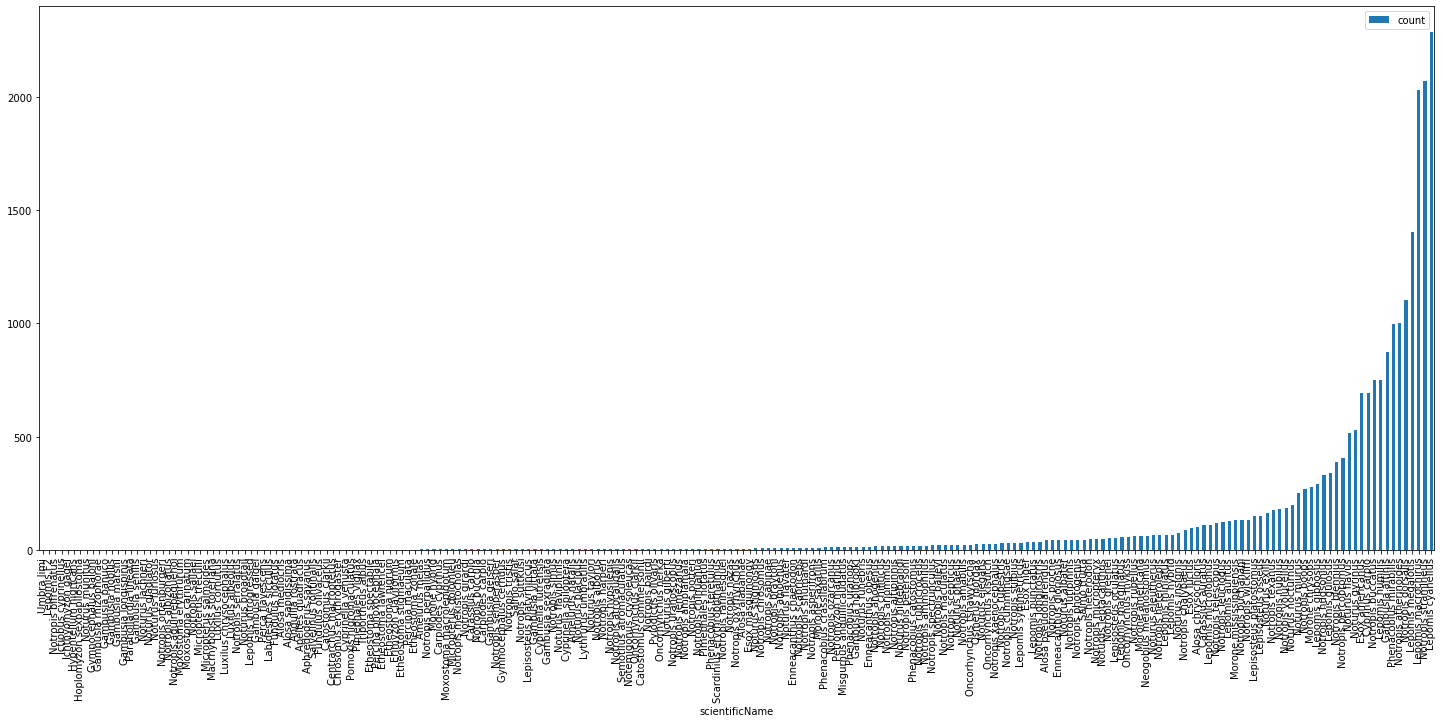

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

suffix = str(params["suffix"])+"/" if ("suffix" in params and params["suffix"] is not None) else ""

full_path = params["image_path"] + "/" + suffix + "count_per_species.csv"
species_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"})
print(species_count_table)
species_count_table.plot.bar(x=species_csv_scientificName_header, y='count', rot=90, figsize=(25, 10))
plt.savefig(params["image_path"] + "/" + suffix+ 'count_per_species.pdf')

             Family          Genus  count
0       Anguillidae       Anguilla      1
50       Salmonidae     Salvelinus      1
45  Petromyzontidae   Ichthyomyzon      1
43         Percidae          Perca      1
33   Gasterosteidae        Apeltes      1
51  Triacanthodidae  Parahollardia      1
24       Cyprinidae   Macrhybopsis      1
19       Cyprinidae      Chrosomus      1
15       Characidae    Triportheus      1
14    Centrarchidae        Pomoxis      1
52         Umbridae          Umbra      1
7      Catostomidae    Hypentelium      1
6      Catostomidae       Erimyzon      1
10    Centrarchidae    Centrarchus      1
3    Atherinopsidae    Labidesthes      1
2      Aspredinidae     Hoplomyzon      1
1    Aphredoderidae   Aphredoderus      1
8      Catostomidae       Ictiobus      1
44         Percidae        Percina      2
32       Fundulidae       Fundulus      2
42         Percidae  Gymnocephalus      3
23       Cyprinidae      Lythrurus      3
22       Cyprinidae        Luxilus

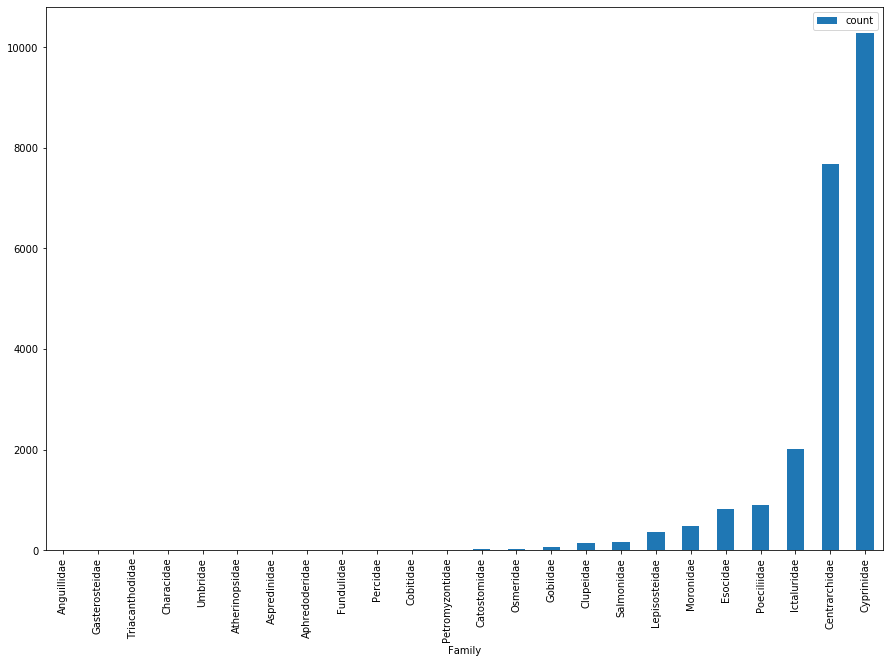

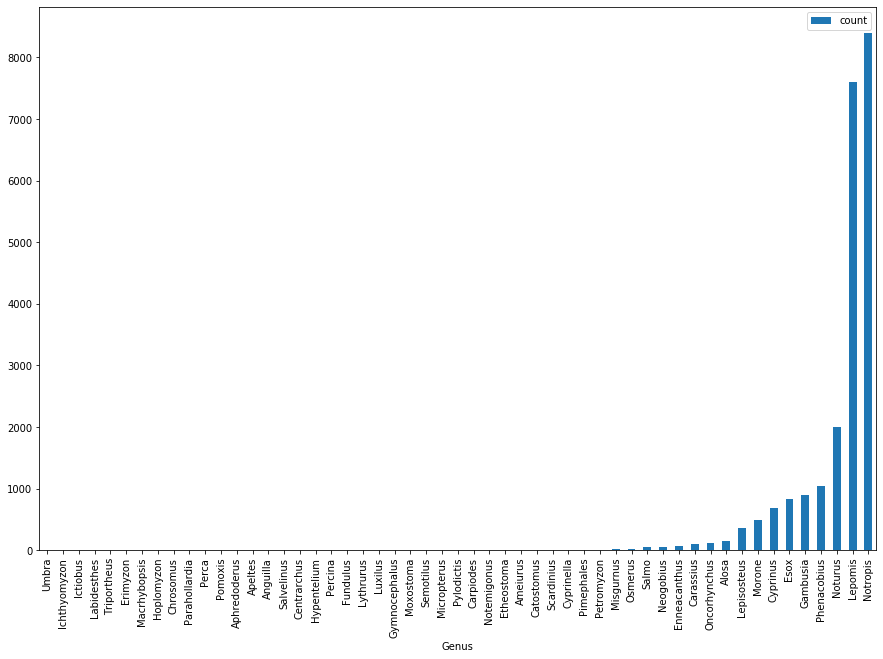

In [10]:
full_path = params["image_path"]+ "/" + suffix + "count_per_family_genis.csv"
family_genis_count_table = pd.read_csv(full_path).rename(columns={species_csv_fileName_header: "count"}).sort_values(by=['count'])
print(family_genis_count_table)
family_genis_count_table.groupby(species_csv_Family_header).agg('sum').reset_index(name='count').sort_values(by=['count']).plot.bar(x=species_csv_Family_header, y='count', rot=90, figsize=(15, 10))
plt.savefig(params["image_path"]+ "/" + suffix + 'count_per_family.pdf')
family_genis_count_table.groupby(species_csv_Genus_header).agg('sum').reset_index(name='count').sort_values(by=['count']).plot.bar(x=species_csv_Genus_header, y='count', rot=90, figsize=(15, 10))
plt.savefig(params["image_path"]+ "/" + suffix + 'count_per_genis.pdf')

Get count matrix

Genus                        Alosa  Ameiurus  Anguilla  Apeltes  Aphredoderus  \
scientificName                                                                  
Alosa alabamae                   6         0         0        0             0   
Alosa chrysochloris            101         0         0        0             0   
Alosa mediocris                  1         0         0        0             0   
Alosa pseudoharengus            42         0         0        0             0   
Alosa sapidissima                1         0         0        0             0   
...                            ...       ...       ...      ...           ...   
Salvelinus fontinalis            0         0         0        0             0   
Scardinius erythrophthalmus      0         0         0        0             0   
Semotilus atromaculatus          0         0         0        0             0   
Triportheus albus                0         0         0        0             0   
Umbra limi                  

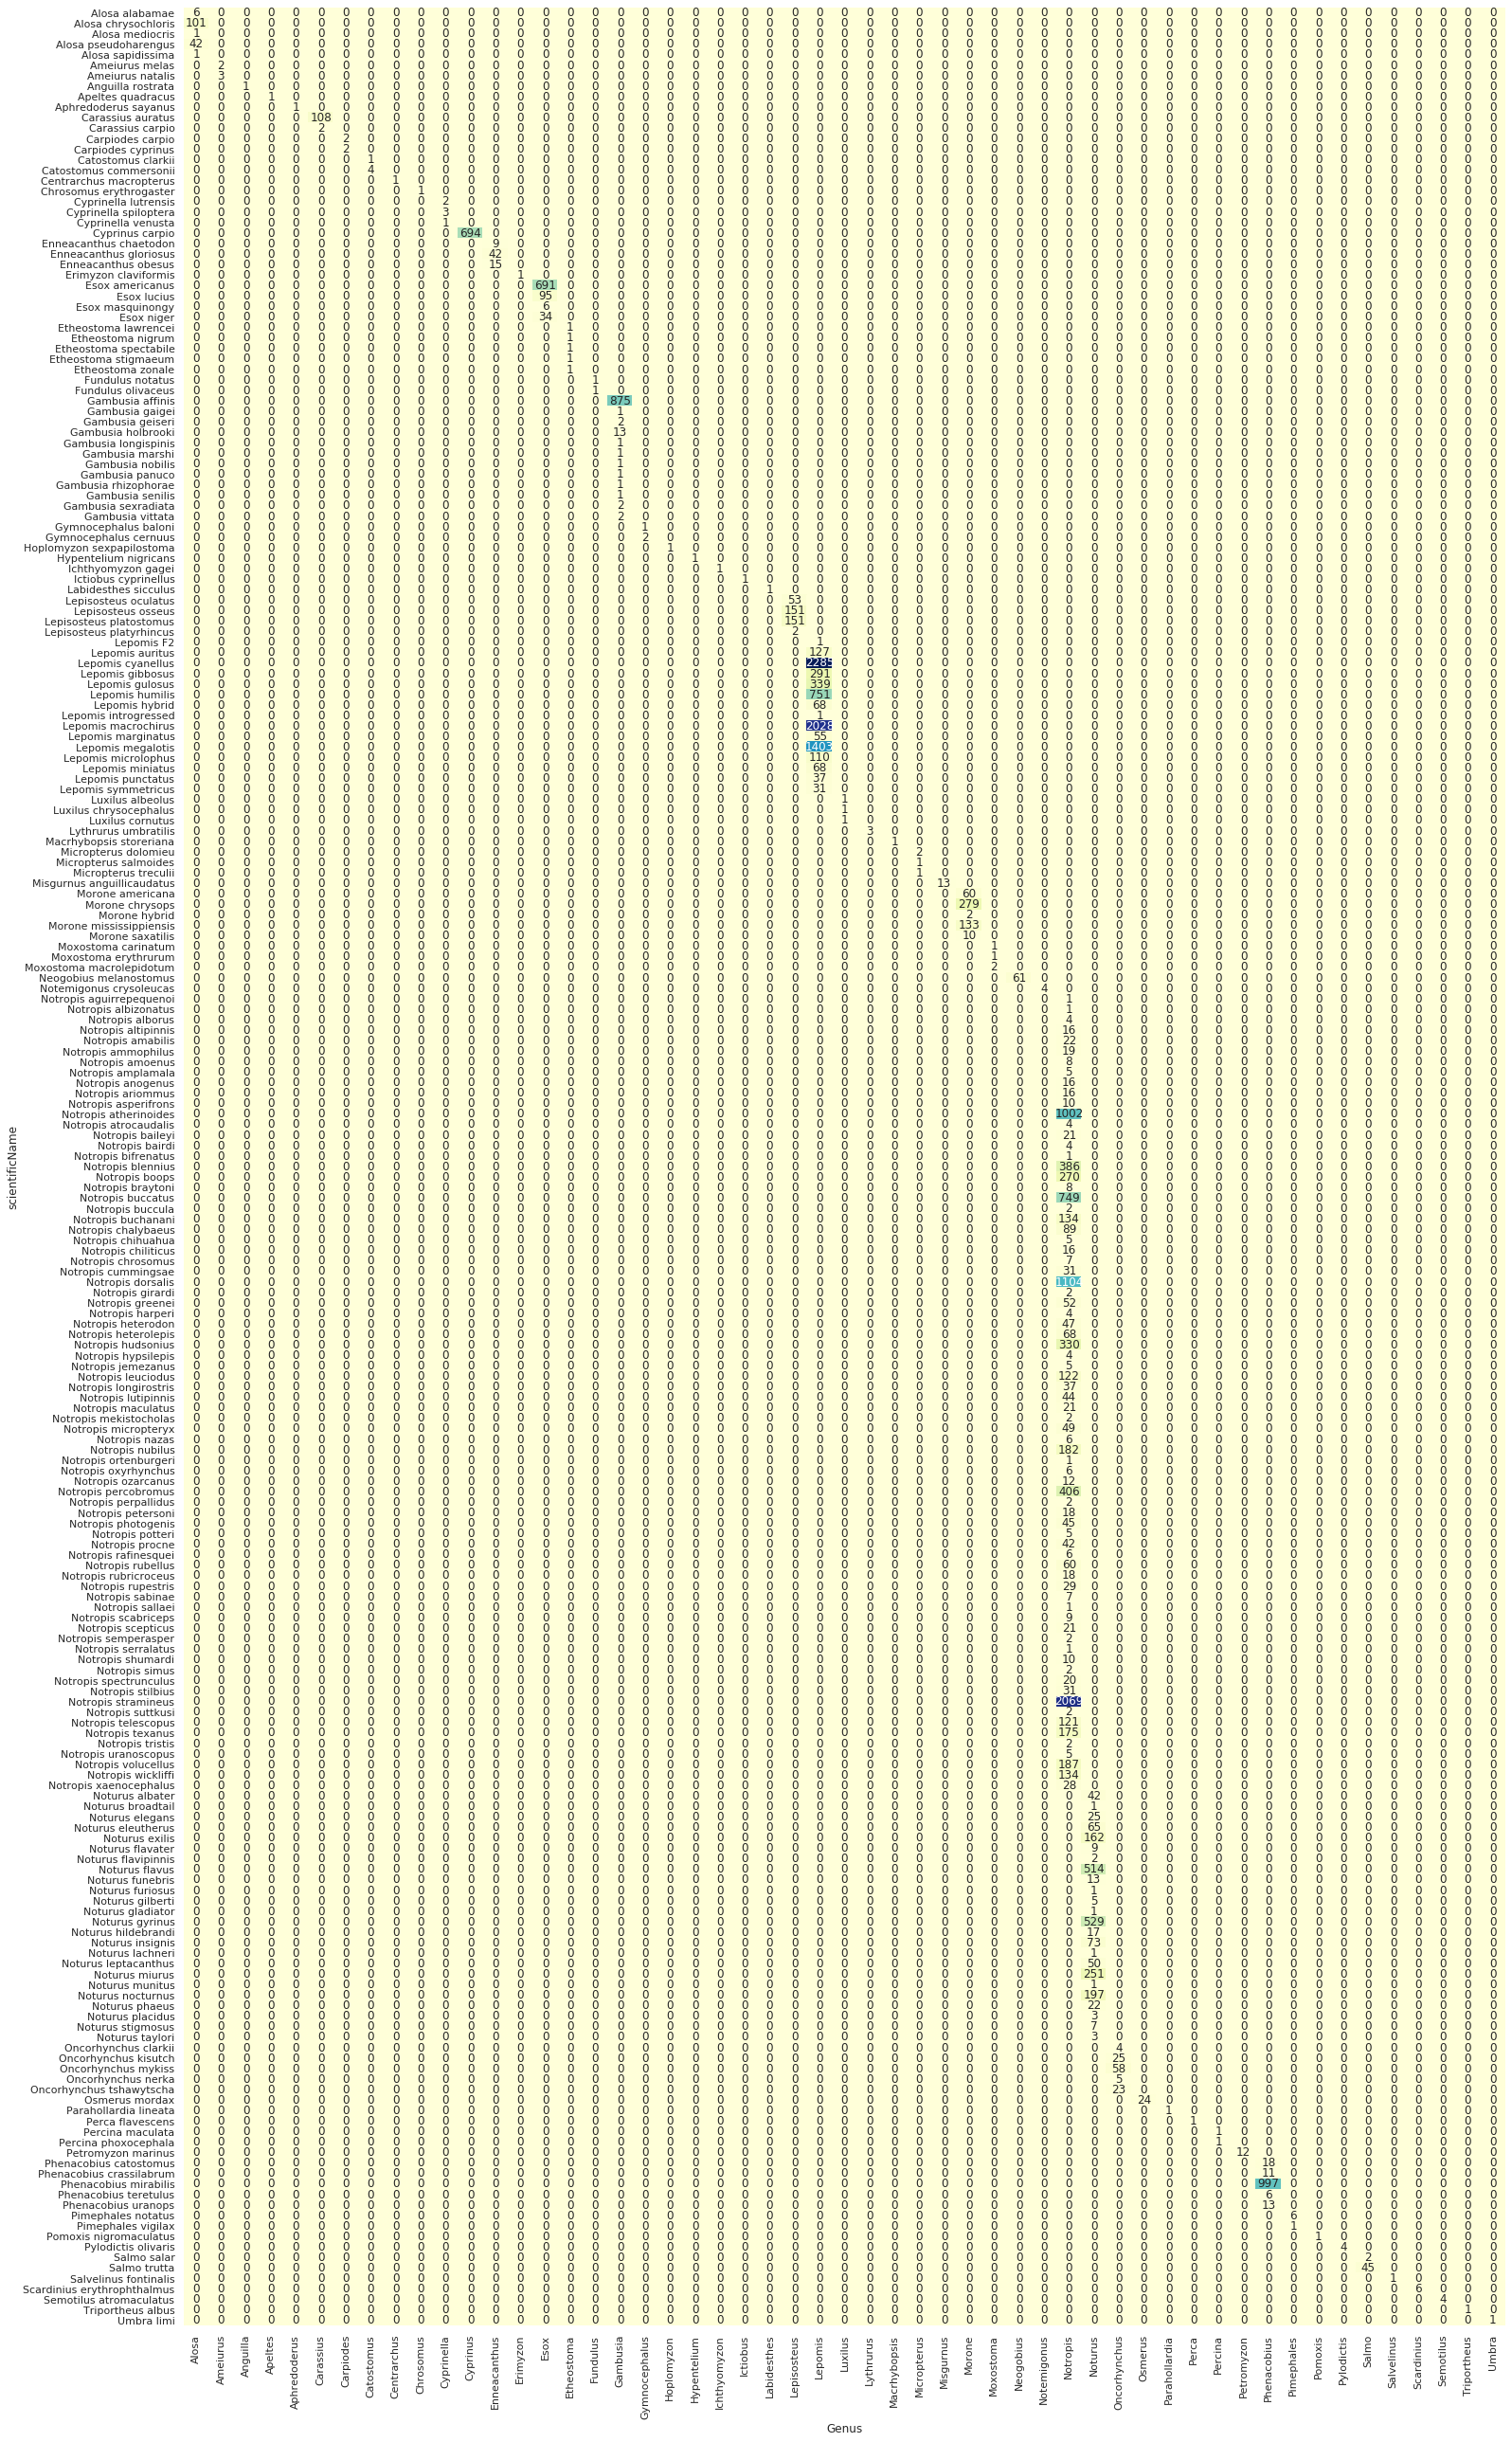

In [11]:
import numpy as np
import seaborn as sns; sns.set()

cleaned_metadata = pd.read_csv(params["image_path"]+ "/" + suffix + cleaned_species_csv_fileName, sep='\t')
species_genis_matrix = cleaned_metadata.groupby([species_csv_scientificName_header, species_csv_Genus_header]).size().unstack(fill_value=0)

print(species_genis_matrix)
fig, ax = plt.subplots(figsize=(25,45))
sns.heatmap(species_genis_matrix, annot=True, fmt="d", ax=ax, cmap="YlGnBu", cbar=False)
plt.savefig(params["image_path"]+ "/" + suffix + 'species_genis_matrix.pdf')
species_genis_matrix.to_csv(params["image_path"]+ "/" + suffix+ 'species_genis_matrix.csv', sep='\t')

Get most frequent Genuses and clip them to a certain size

In [12]:
import os
for size in list_of_sizes_of_interest:
    sub_path = params["image_path"]+"/"+str(size)
    if not os.path.exists(sub_path):
            os.makedirs(sub_path)
    # find species with image count more than a threshold
    genus_groupedby_species = cleaned_metadata.groupby([species_csv_Genus_header, species_csv_scientificName_header]).filter(lambda x: x[species_csv_fileName_header].count() >= size)
    genus_groupedby_species = genus_groupedby_species.groupby([species_csv_Genus_header, species_csv_scientificName_header]).agg(len).rename(columns={species_csv_fileName_header: "count"})['count']
    print("\nSpecies of sample size", size)
    print(genus_groupedby_species)
    # get n top for each species
    species_list = genus_groupedby_species.reset_index()['scientificName'].unique()
    trimmed_cleaned_metadata = cleaned_metadata.loc[cleaned_metadata[species_csv_scientificName_header].isin(species_list)].groupby(species_csv_scientificName_header).head(size)
    print(trimmed_cleaned_metadata)
    trimmed_cleaned_metadata.to_csv(sub_path+ '/'+cleaned_species_csv_fileName, sep="\t", index=False)
    




Species of sample size 20
Genus         scientificName          
Alosa         Alosa chrysochloris         101
              Alosa pseudoharengus         42
Carassius     Carassius auratus           108
Cyprinus      Cyprinus carpio             694
Enneacanthus  Enneacanthus gloriosus       42
                                         ... 
Oncorhynchus  Oncorhynchus mykiss          58
              Oncorhynchus tshawytscha     23
Osmerus       Osmerus mordax               24
Phenacobius   Phenacobius mirabilis       997
Salmo         Salmo trutta                 45
Name: count, Length: 80, dtype: int64
                   fileName          scientificName        Genus  \
0      INHS_FISH_106556.jpg       Lepomis cyanellus      Lepomis   
1       INHS_FISH_81302.jpg      Lepisosteus osseus  Lepisosteus   
2       INHS_FISH_99690.jpg         Noturus gyrinus      Noturus   
3       INHS_FISH_65079.jpg     Lepomis macrochirus      Lepomis   
4       INHS_FISH_75132.jpg       Lepomis megaloti

Get image size statistics

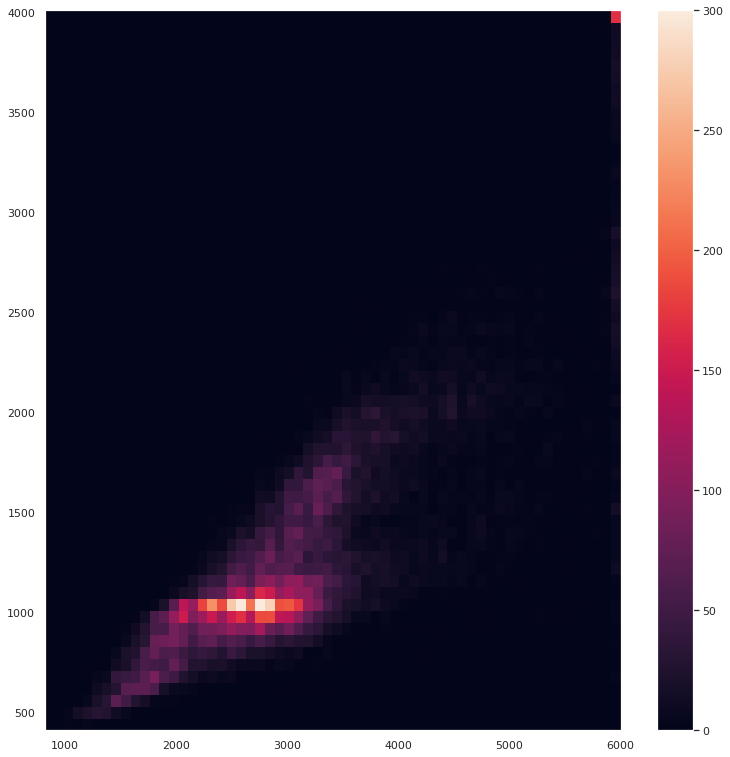

In [17]:
import PIL
from PIL import Image

# Get params
data_root = params["image_path"]
suffix = str(params["suffix"])+"/" if ("suffix" in params and params["suffix"] is not None) else ""

# Get file
cleaned_species_csv_fileName_withsuffix = cleaned_species_csv_fileName
cleaned_species_csv_fileName_full_path = data_root+"/"+suffix + cleaned_species_csv_fileName_withsuffix
cleaned_species_csv_file_exists = os.path.exists(cleaned_species_csv_fileName_full_path)
species_csv = pd.read_csv(cleaned_species_csv_fileName_full_path, delimiter='\t', index_col=species_csv_fileName_header, usecols=species_csv_usedColumns)
img_count = len(species_csv.index)

# Get image sizes
width=[]
height=[]
for indx, row in species_csv.iterrows(): 
    image = PIL.Image.open(data_root+image_subpath+"/"+indx)
    w, h = image.size
    width.append(w)
    height.append(h)

# plot histogram
plt.figure(figsize=(10, 10))
plt.hist2d(width, height, bins=60)
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)
plt.colorbar()
plt.show()

Print images per species (visual verification)

In [ ]:
import math

# Plot
number_per_row = 300
n_rows = math.ceil(img_count/number_per_row)
fig, axes = plt.subplots(n_rows, number_per_row, figsize=(15, 2.5*n_rows), dpi= 300)
print("hi")

out_index = 0
in_index = 0
for i, ax in enumerate(axes.flat):
    if i < img_count:
        image = PIL.Image.open(data_root+image_subpath+"/"+i)
        speciesName = species_csv.loc[i][species_csv_scientificName_header]
        ax.set_xlabel(speciesName)

        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        break
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

KeyboardInterrupt: 